# Initial setup and file names

In [1]:
import sys
import os
import geopandas as gpd
import pandas as pd


sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))


from src.data_analysis.ecmwf_data_analysis import *
from src.data_retrieval.util import setup_output_path


In [2]:

input_data_path = './data/input_data/'
output_data_path = './data/output_data/'

output_era5_file_name = 'era5-ethiopia'
output_ecmwf_file_name = 'ecmwf-ethiopia'

admin_file_name = 'admin_boundary_eth/eth_admbnda_adm1_csa_bofedb_2021.shp'
admin_code_label = 'ADM1_PCODE'

#Define the months to be used in the analysis.
#Include all 12 months (by default) or a selection depending on rainy season

#month_range = [1,2,3,4,5,6,7,8,9,10,11,12]
month_range = [1,2,3,4,5,6,7,8,9,10,11,12]

#Define the list of quantile values to be used in the last part of the analysis
quantile_value_list = [1/2,1/3,1/4,1/5]



In [3]:
def create_file_name(output_data_path, 
                     output_era5_file_name, 
                     output_ecmwf_file_name, 
                     admin_file_name, 
                     admin_code_label
                     ):  
    
    global admin_boundary_file_path, ecmwf_processed_pixel_file_path, ecmwf_processed_adm_file_path, era5_processed_pixel_file_path, era5_processed_adm_file_path
    

    admin_boundary_file_path = input_data_path + admin_file_name
    ecmwf_processed_pixel_file_path =  output_data_path + output_ecmwf_file_name + '-processed-pixel' + '.parquet.gzip'
    ecmwf_processed_adm_file_path = output_data_path + output_ecmwf_file_name + '-processed-adm' + '.parquet.gzip'
    era5_processed_pixel_file_path =  output_data_path + output_era5_file_name + '-processed-pixel' + '.parquet.gzip'
    era5_processed_adm_file_path = output_data_path + output_era5_file_name + '-processed-adm' + '.parquet.gzip'


    return()

In [4]:
create_file_name(output_data_path, 
                 output_era5_file_name, 
                 output_ecmwf_file_name, 
                 admin_file_name, 
                 admin_code_label
                 )  

()

## Load Data

In [5]:

era5_pixel_df = pd.read_parquet(era5_processed_pixel_file_path)
era5_adm_df = pd.read_parquet(era5_processed_adm_file_path)

ecmwf_pixel_df = pd.read_parquet(ecmwf_processed_pixel_file_path)
ecmwf_adm_df = pd.read_parquet(ecmwf_processed_adm_file_path)


admin_df = gpd.read_file(admin_boundary_file_path)
admin_df['adm_pcode'] = admin_df[admin_code_label]

## Precipitation Bias

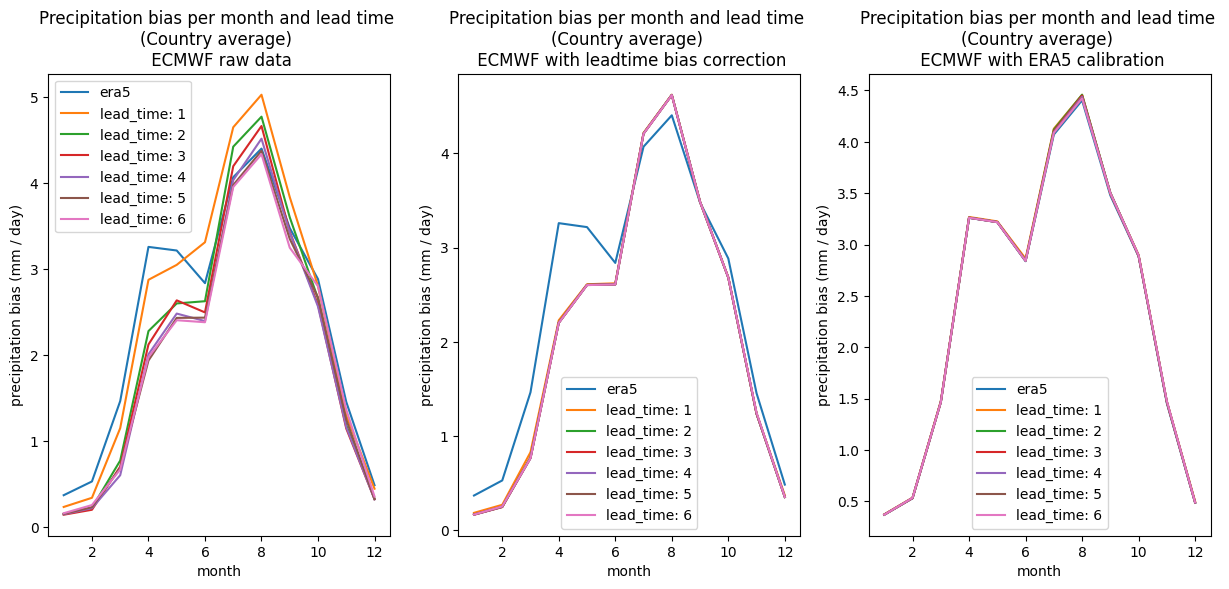

In [6]:

ecmwf_plot_df, era5_plot_df = prepare_climatology(ecmwf_pixel_df, era5_pixel_df)
plot_climatology(ecmwf_plot_df, era5_plot_df, scope_text = 'Country average')



## Leadtime Dependency

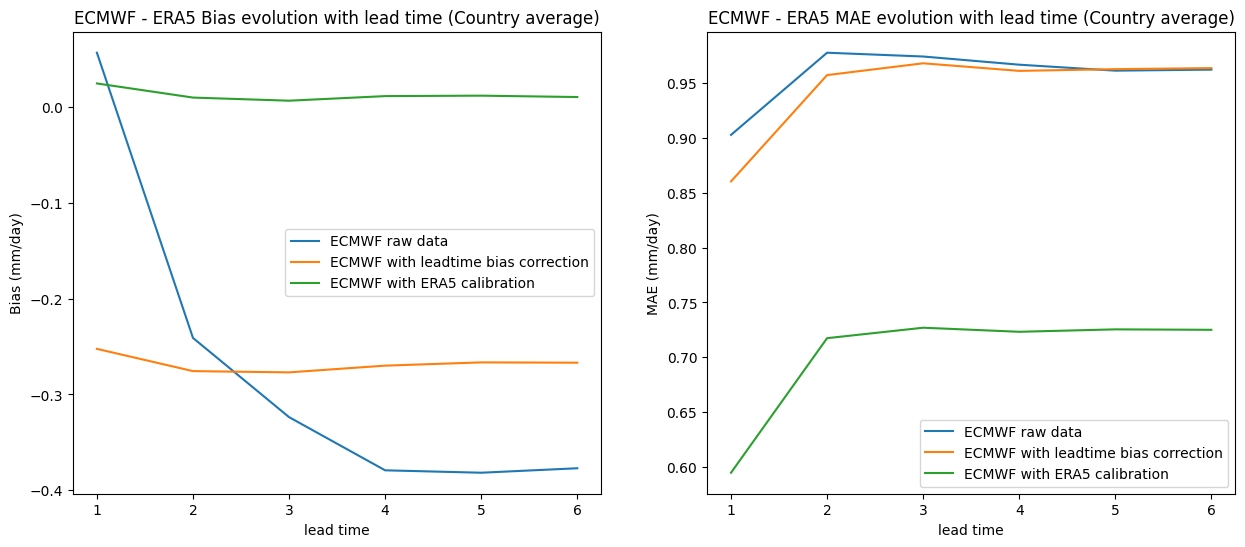

In [7]:

plot_df = prepare_leadtime_month_dependency(ecmwf_pixel_df, era5_pixel_df, month_range)
plot_leadtime_month_dependency(plot_df, scope_text = 'Country average')

## Quantile probablity accuracy analysis

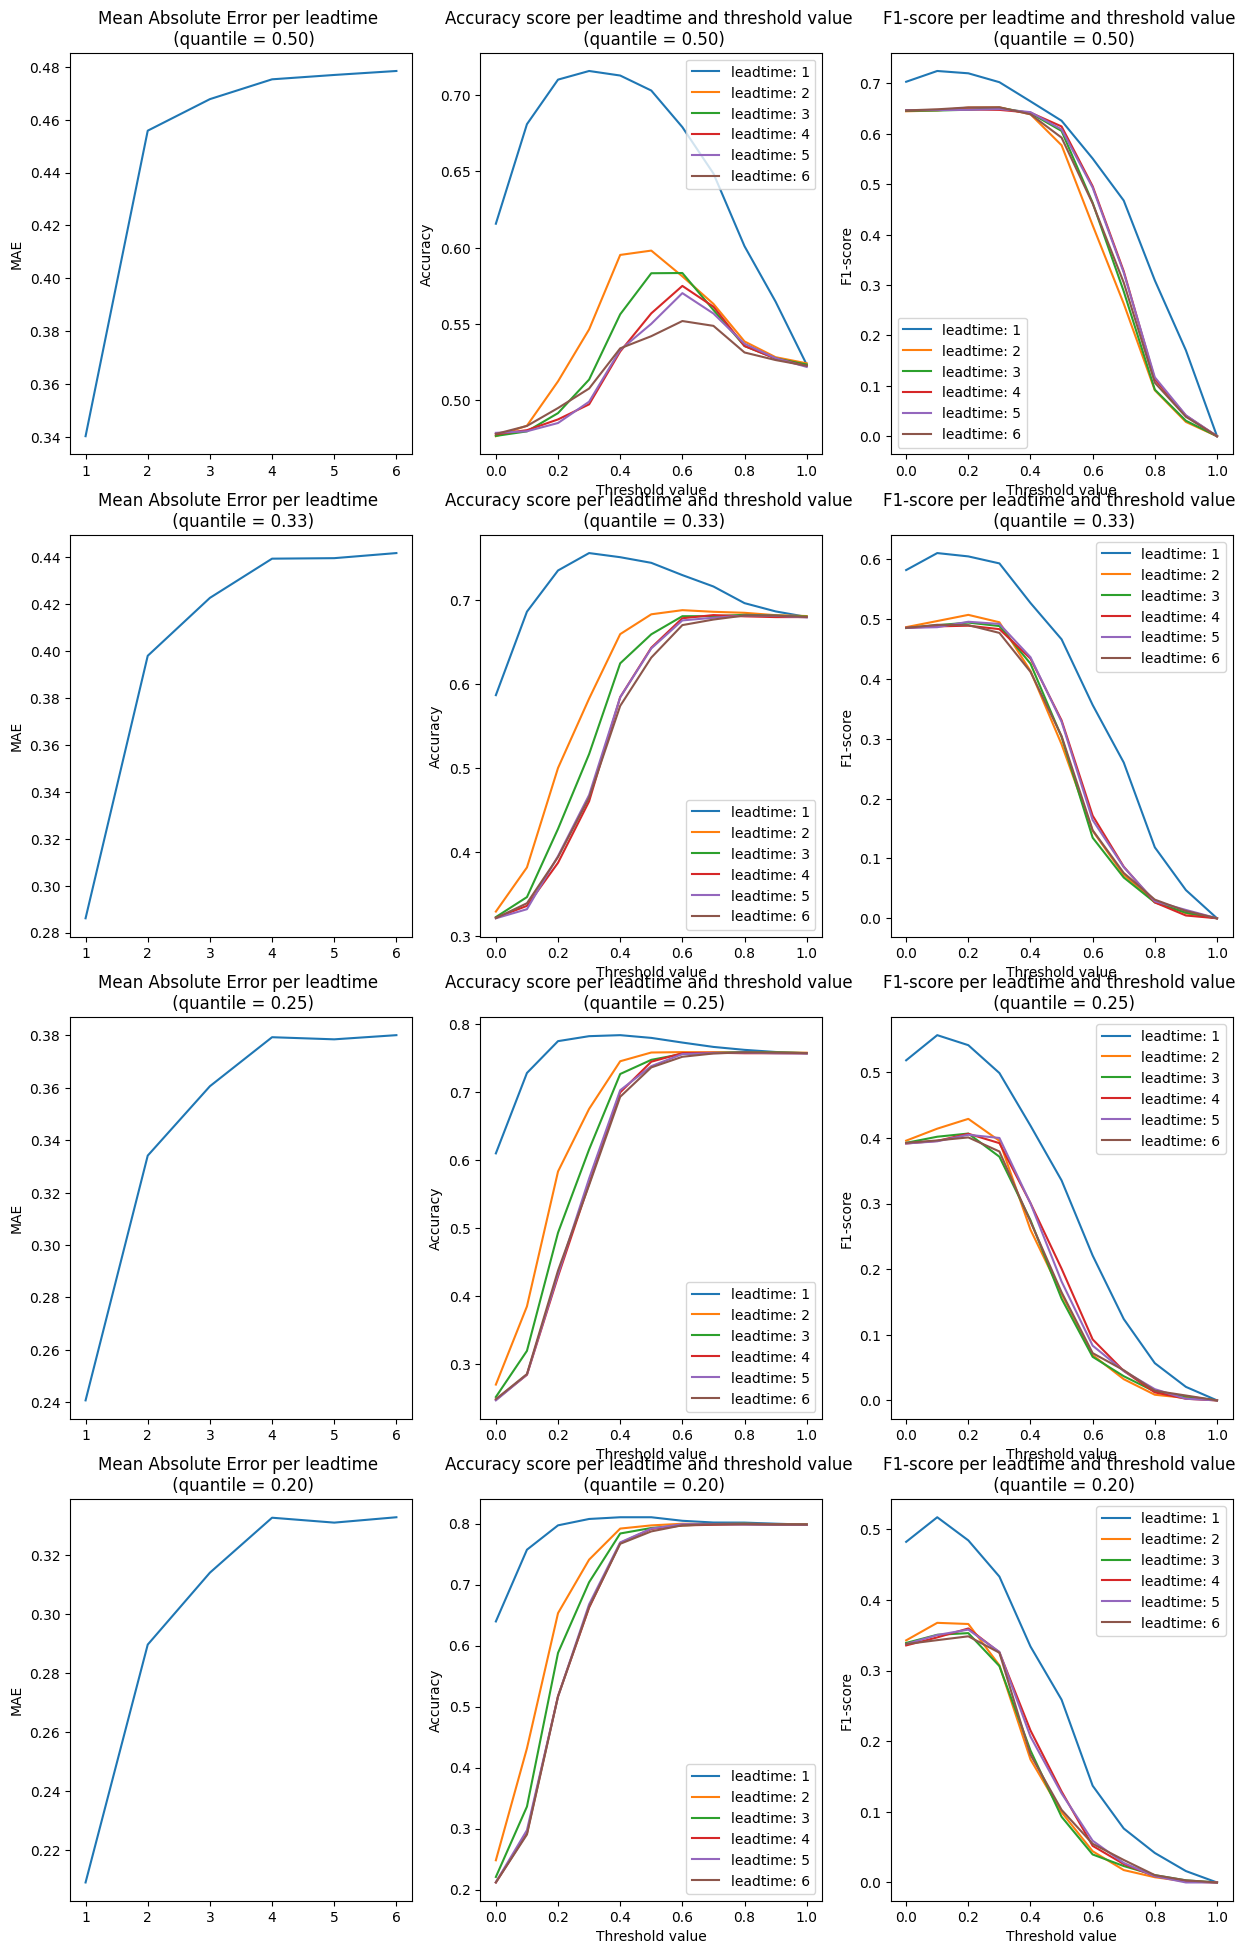

In [8]:


ecmwf_adm_quantile_df = compute_quantile_probability(ecmwf_adm_df, quantile_value_list)
era5_adm_quantile_df = compute_quantile_probability(era5_adm_df, quantile_value_list, 'tp_mm_day')

plot_performance_analysis(ecmwf_adm_quantile_df, era5_adm_quantile_df, quantile_value_list, month_range)


## ROC / AUC probablity analysis

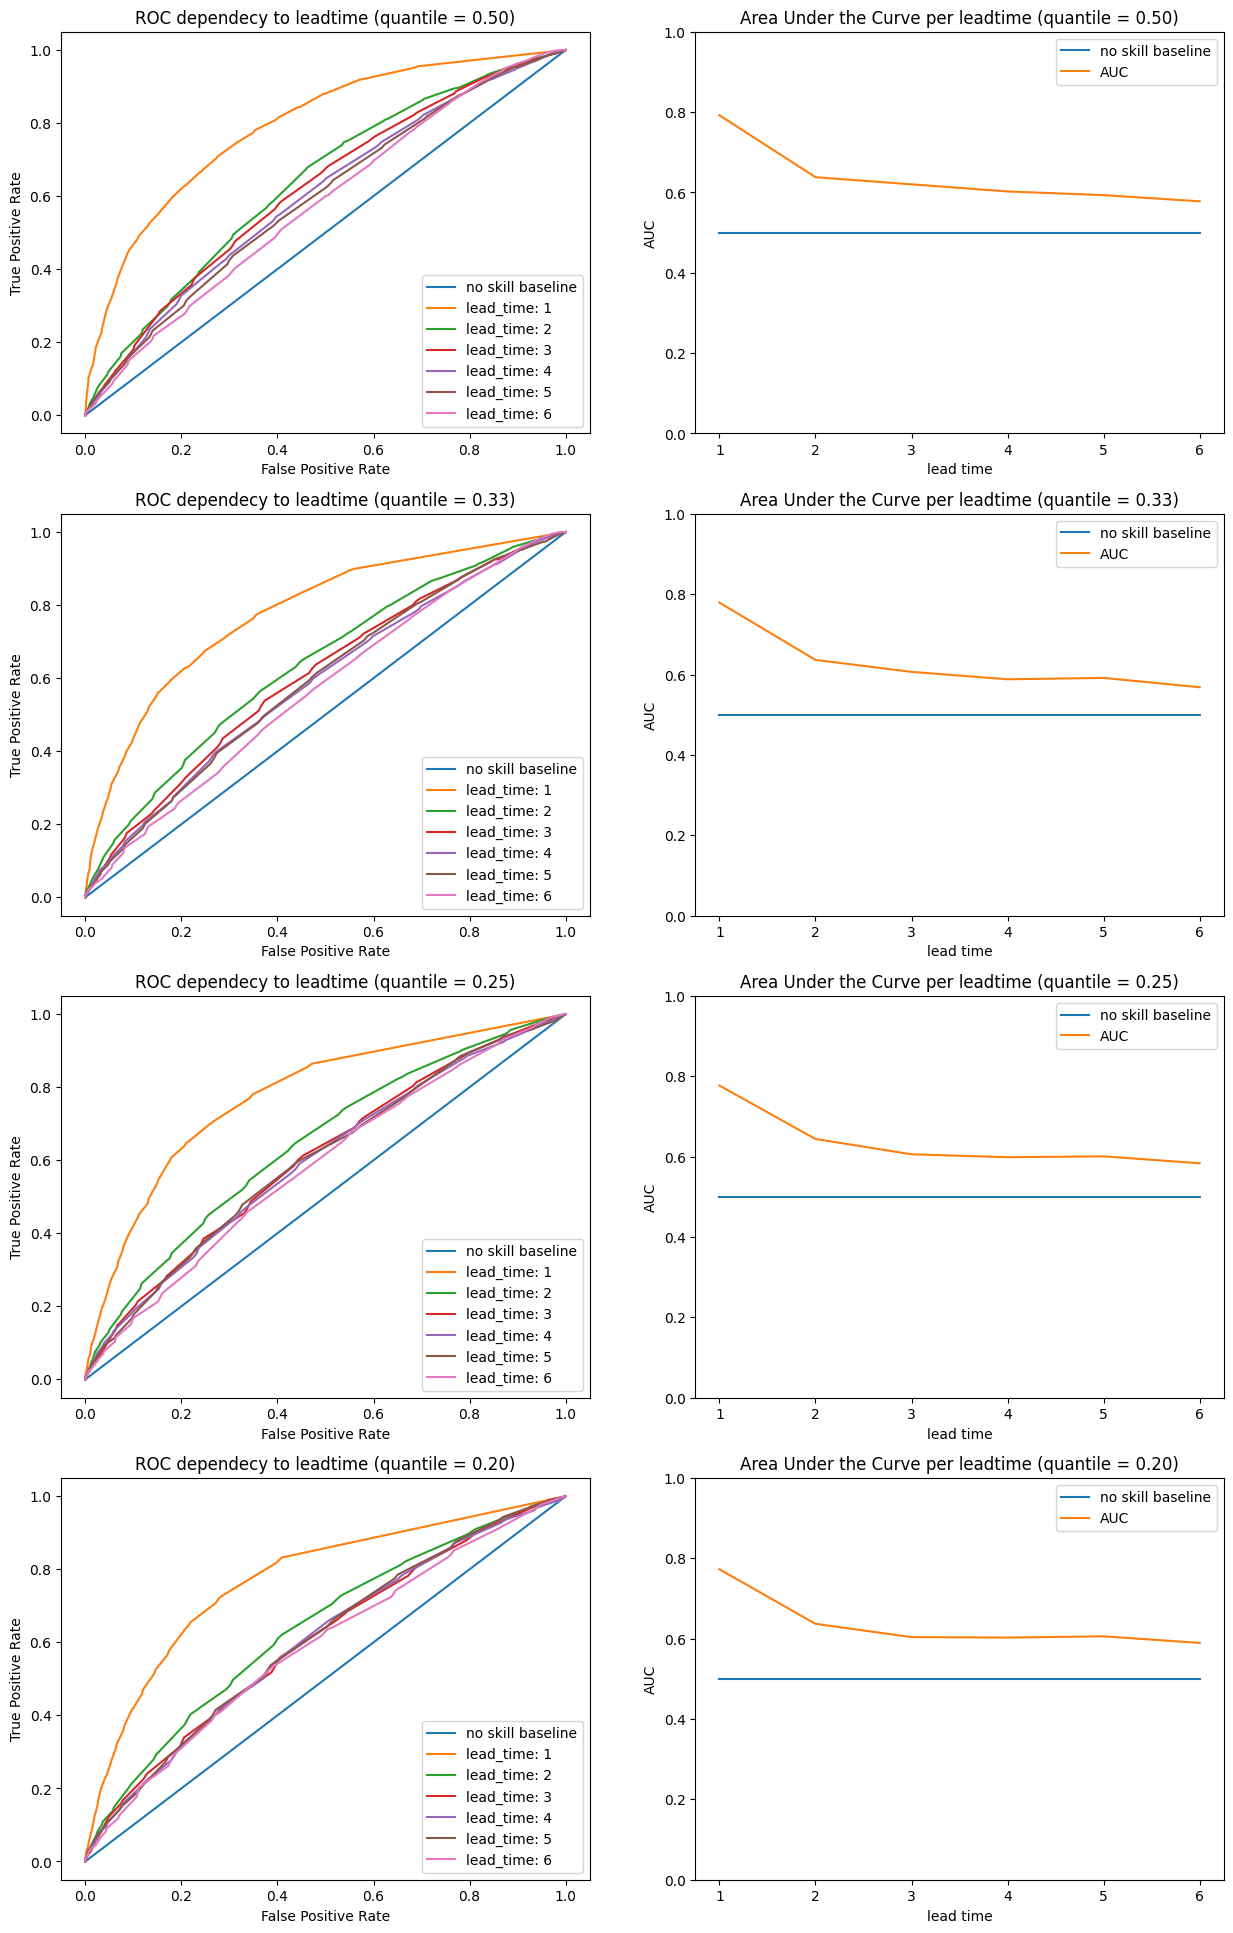

In [9]:

ecmwf_adm_quantile_df = compute_quantile_probability(ecmwf_adm_df, quantile_value_list)
era5_adm_quantile_df = compute_quantile_probability(era5_adm_df, quantile_value_list, 'tp_mm_day')

plot_roc_auc_analysis(ecmwf_adm_quantile_df, era5_adm_quantile_df, quantile_value_list, month_range)


## Visualisation Sandbox

In [10]:
#Leadtime and probability threshold to be used in this spatial plot
leadtime = 1
threshold = 0.25

#Preparation for map per administrative boundary
ecmwf_adm_quantile_df = compute_quantile_probability(ecmwf_adm_df, quantile_value_list)
era5_adm_quantile_df = compute_quantile_probability(era5_adm_df, quantile_value_list, 'tp_mm_day')
plot_adm_df = preparece_accuracy_map(ecmwf_adm_quantile_df, era5_adm_quantile_df, admin_df, quantile_value_list, month_range, leadtime, threshold)

#Preparation for map per pixel
ecmwf_pixel_quantile_df = compute_quantile_probability(ecmwf_pixel_df, quantile_value_list)
era5_pixel_quantile_df = compute_quantile_probability(era5_pixel_df, quantile_value_list, 'tp_mm_day')
plot_pixel_df = preparece_accuracy_map(ecmwf_pixel_quantile_df, era5_pixel_quantile_df, admin_df, quantile_value_list, month_range, leadtime, threshold)


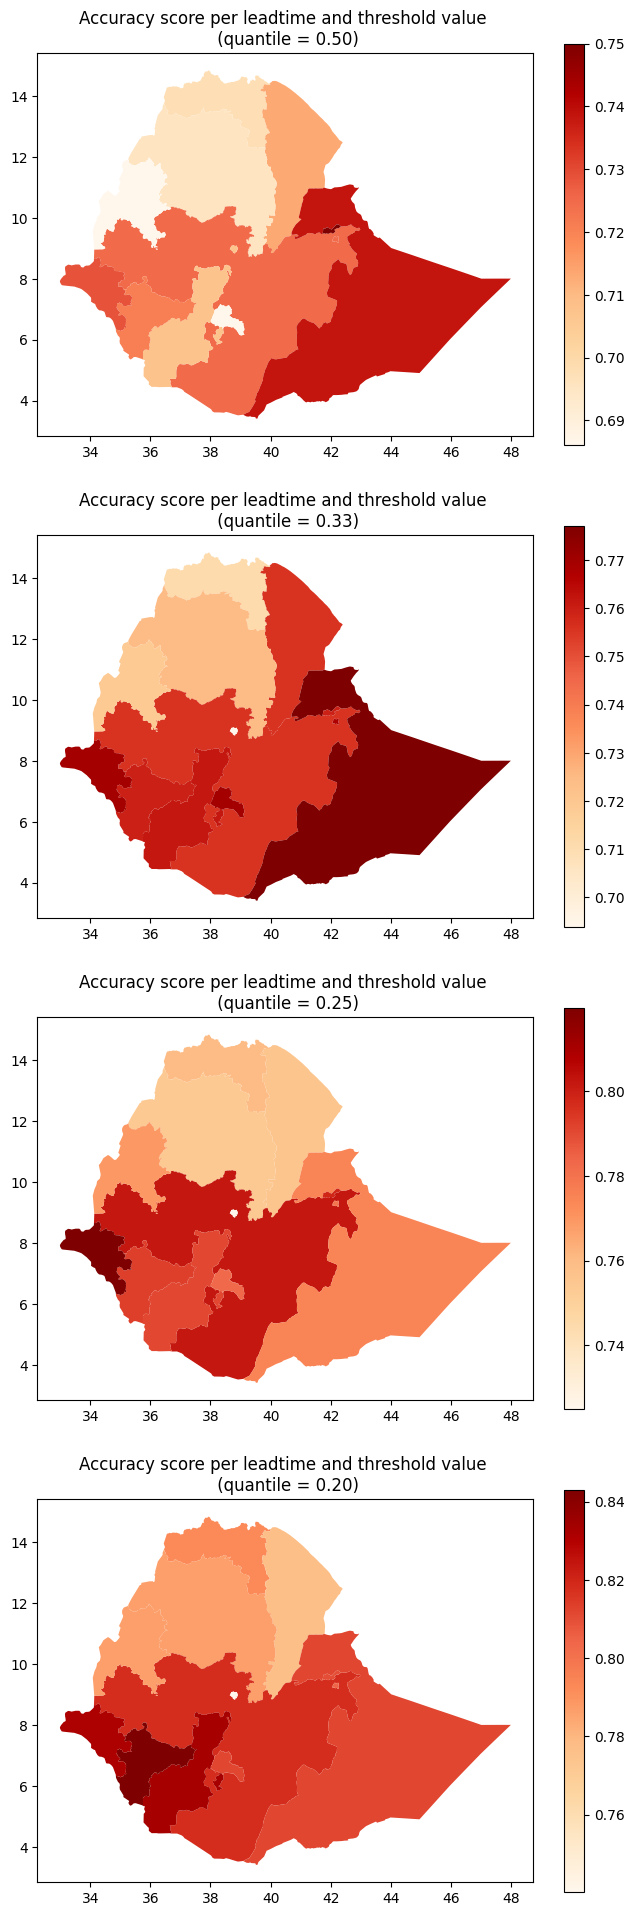

In [11]:
plot_accuracy_map(plot_adm_df, quantile_value_list)

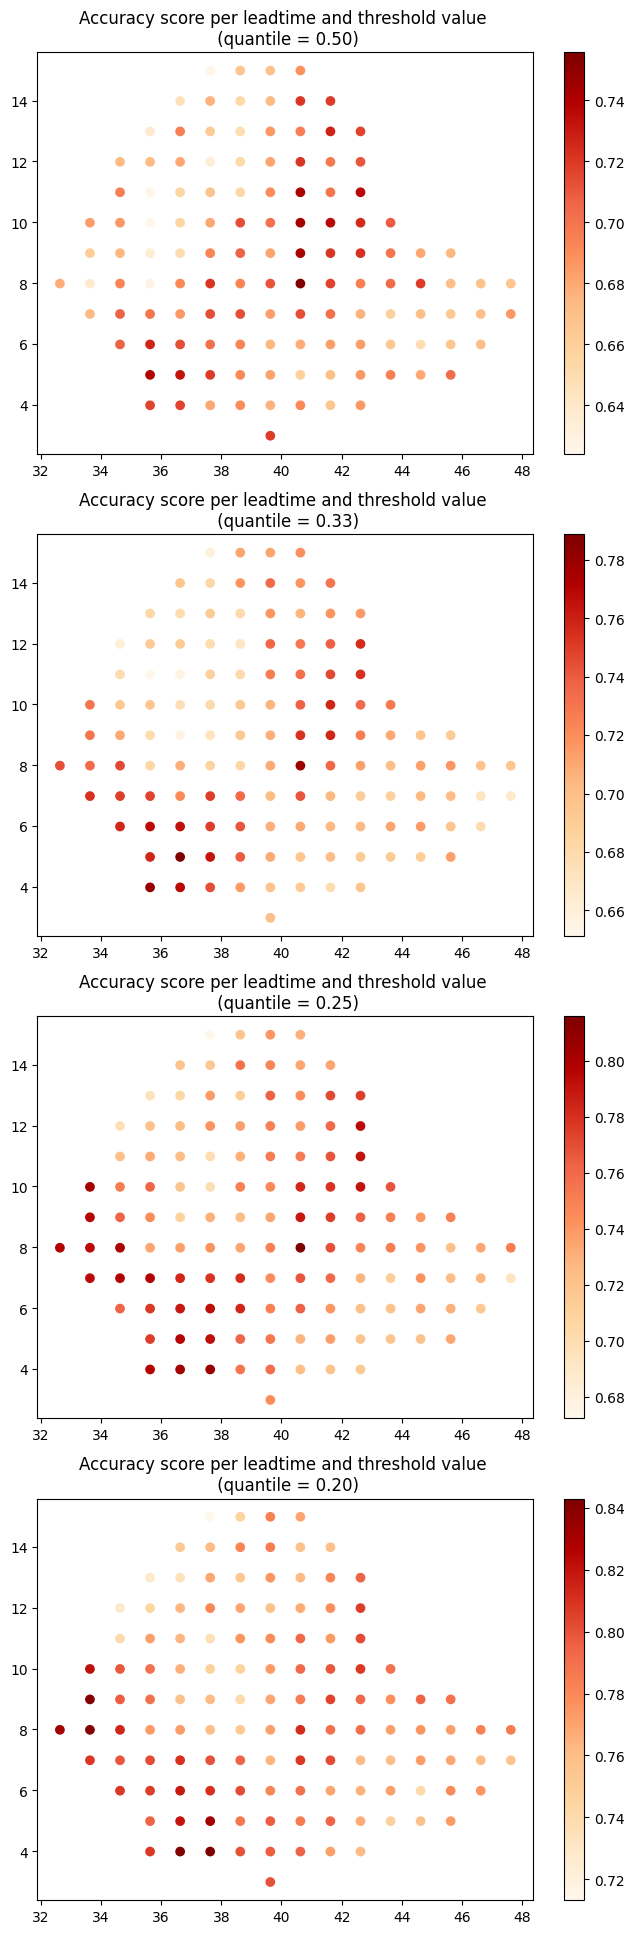

In [12]:
plot_accuracy_map(plot_pixel_df, quantile_value_list)

# Focus on sub-divisions

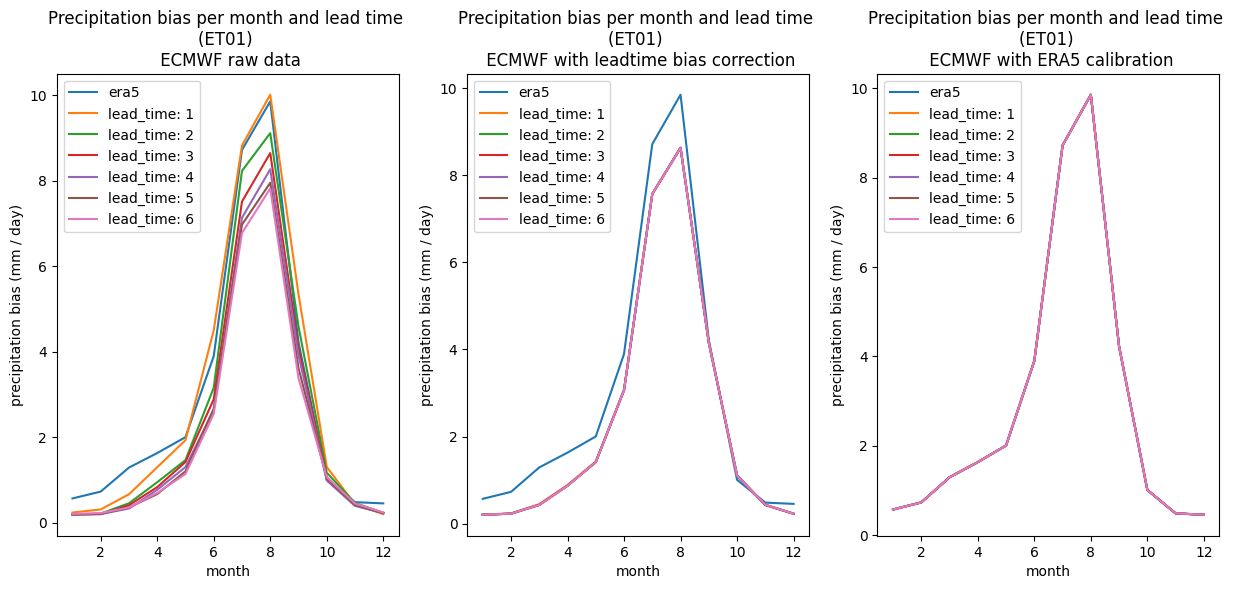

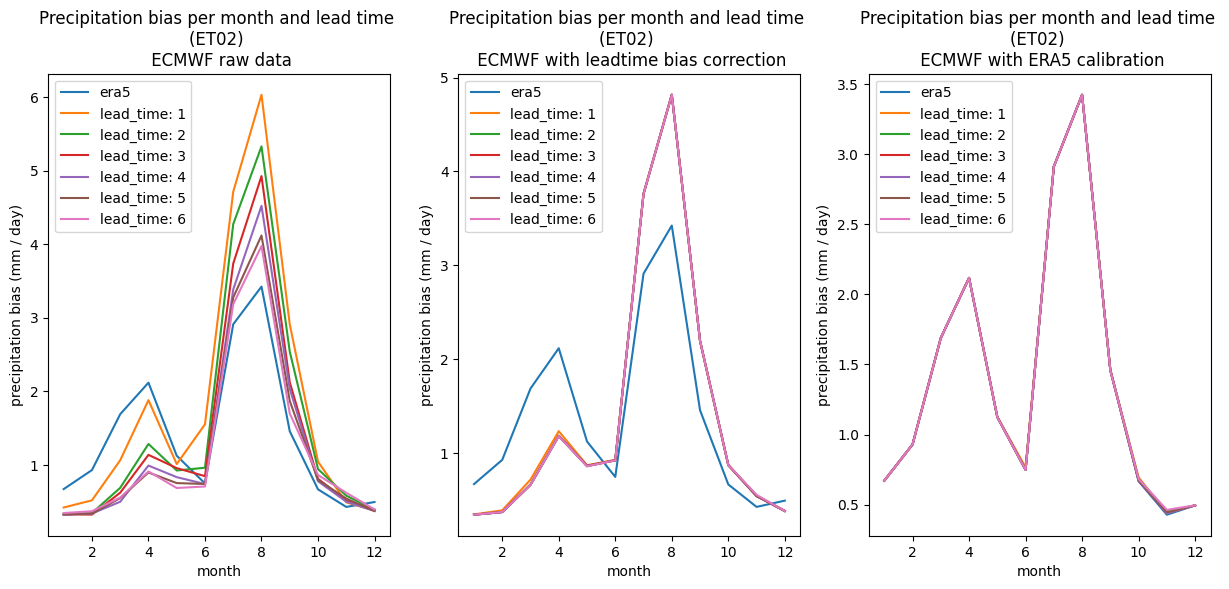

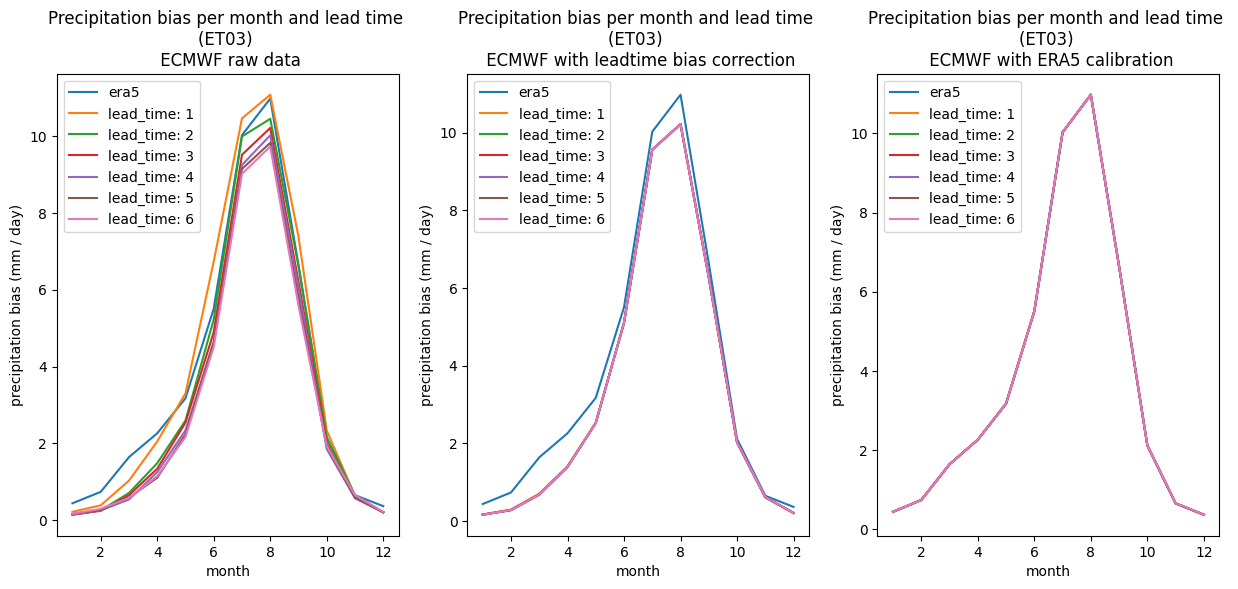

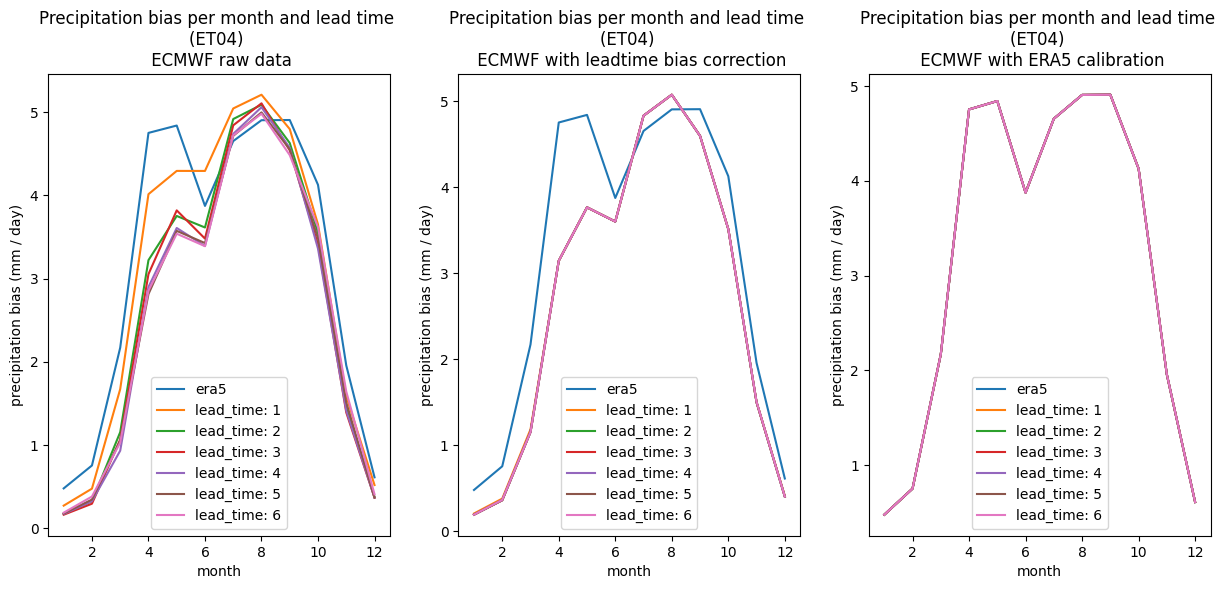

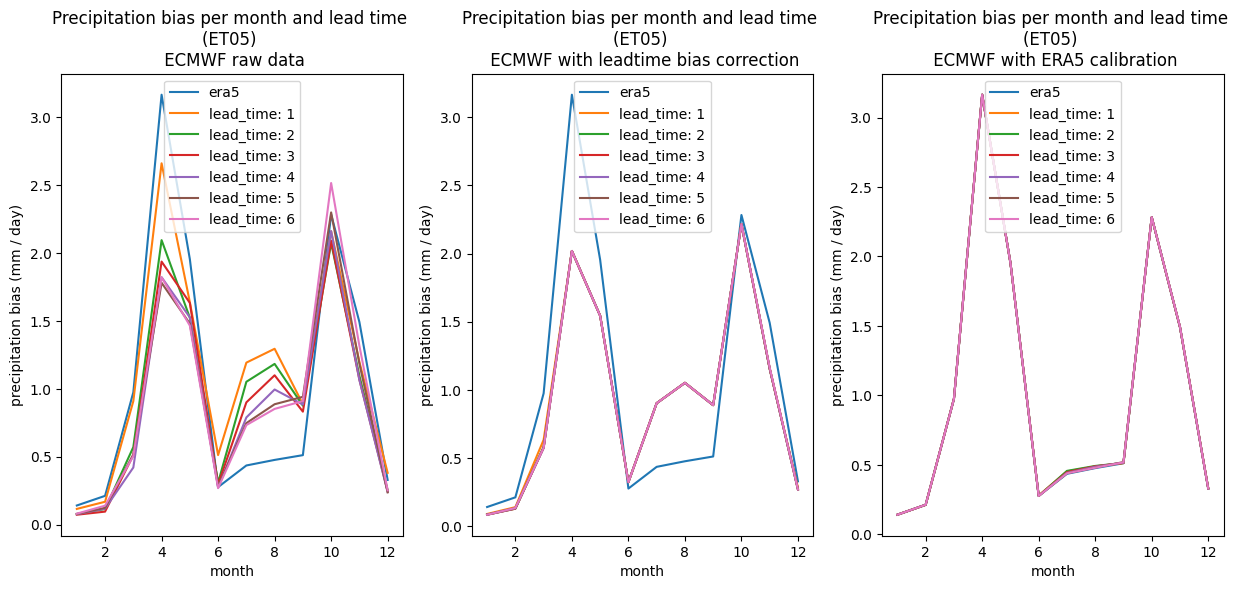

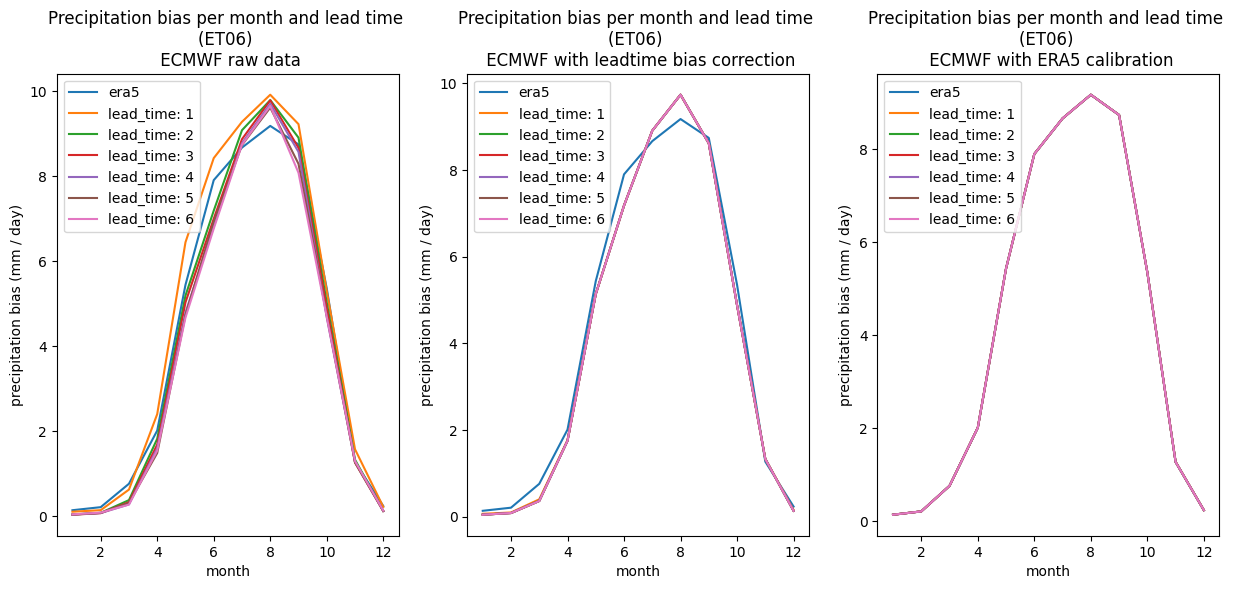

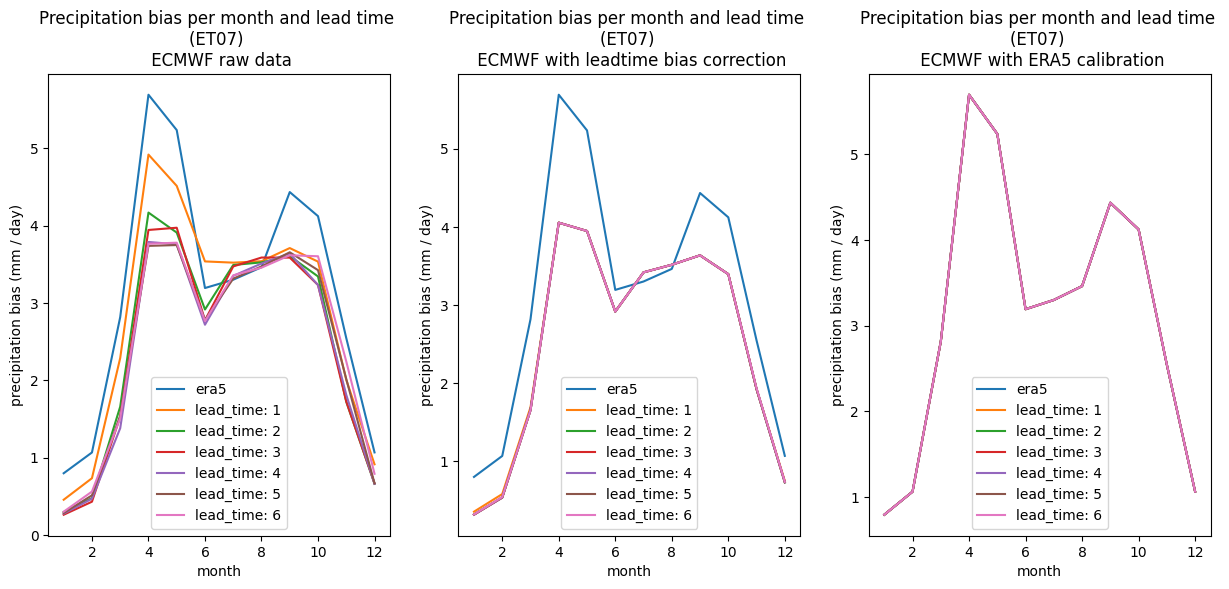

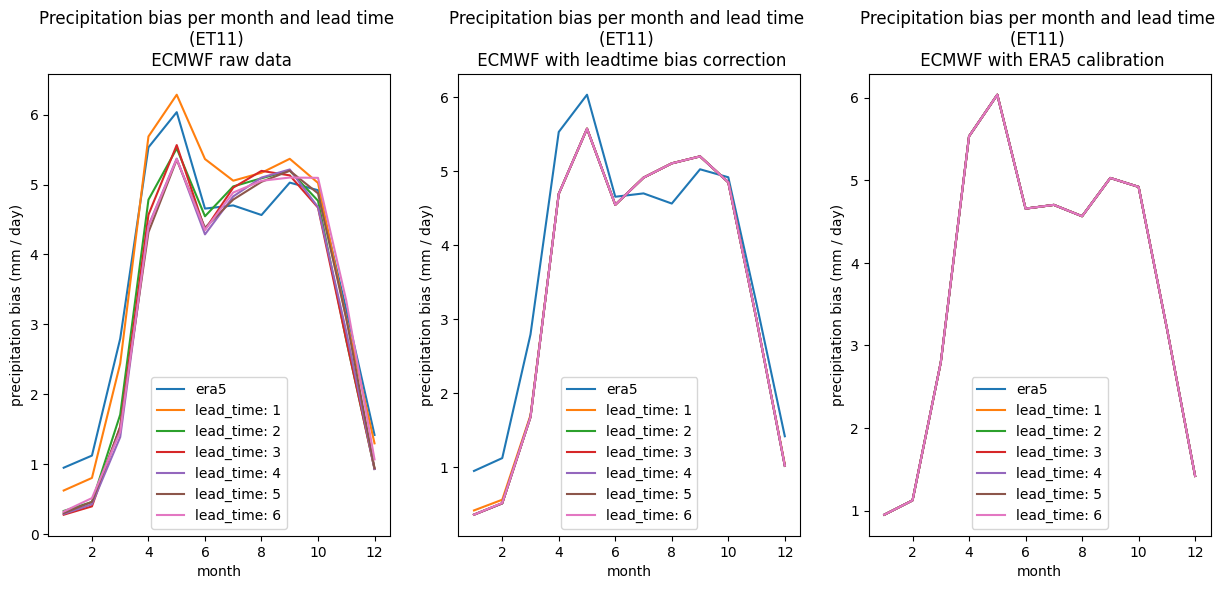

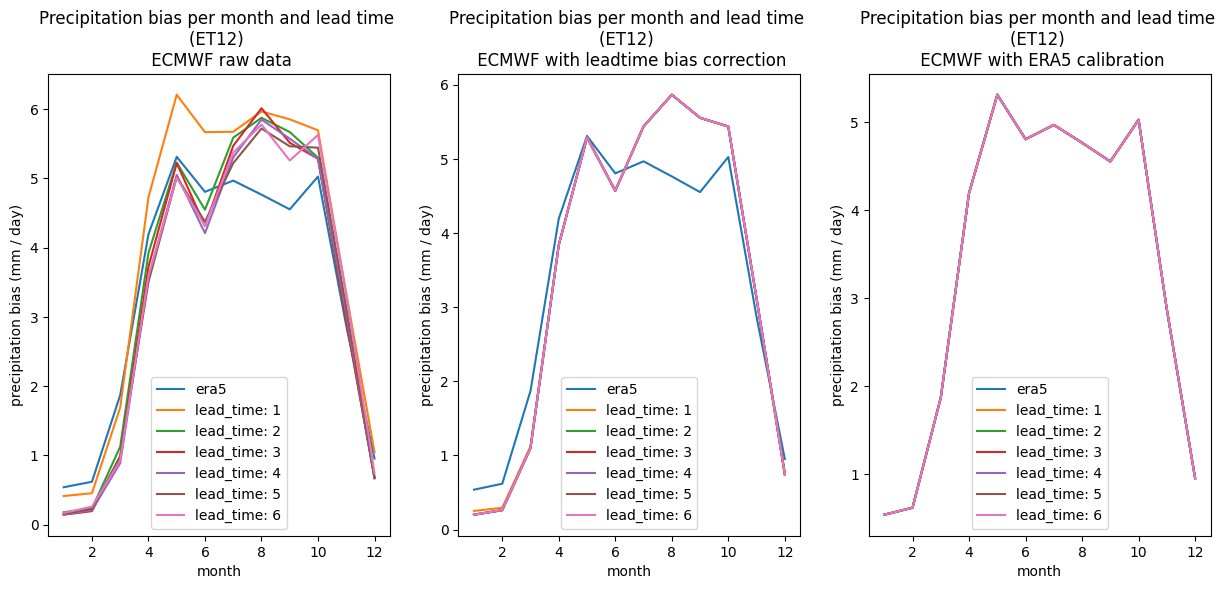

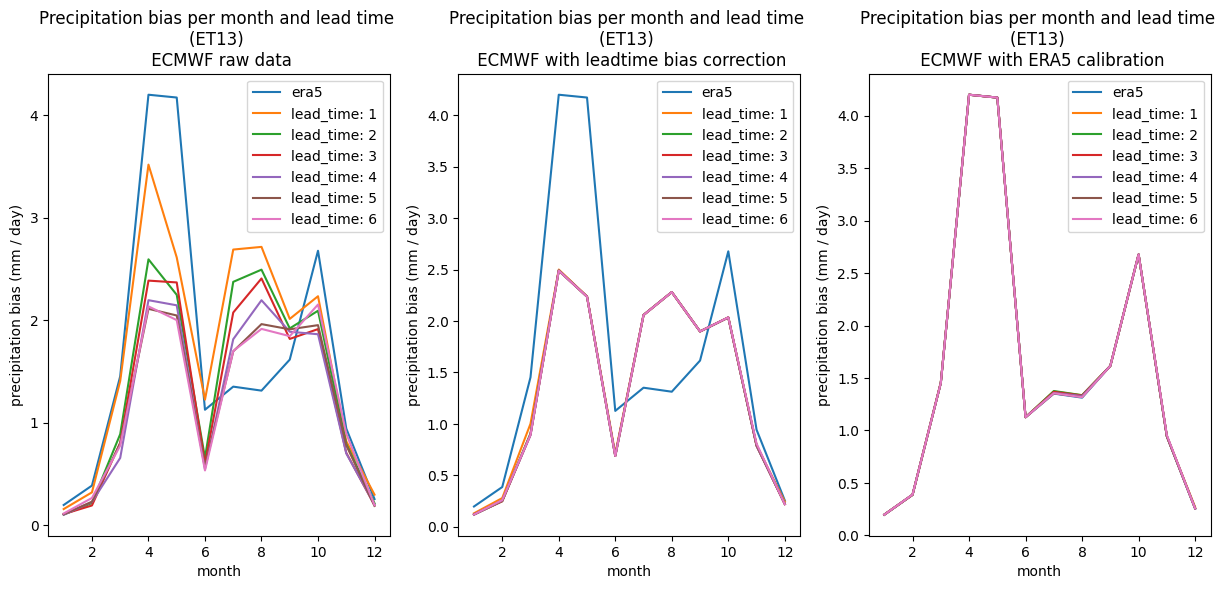

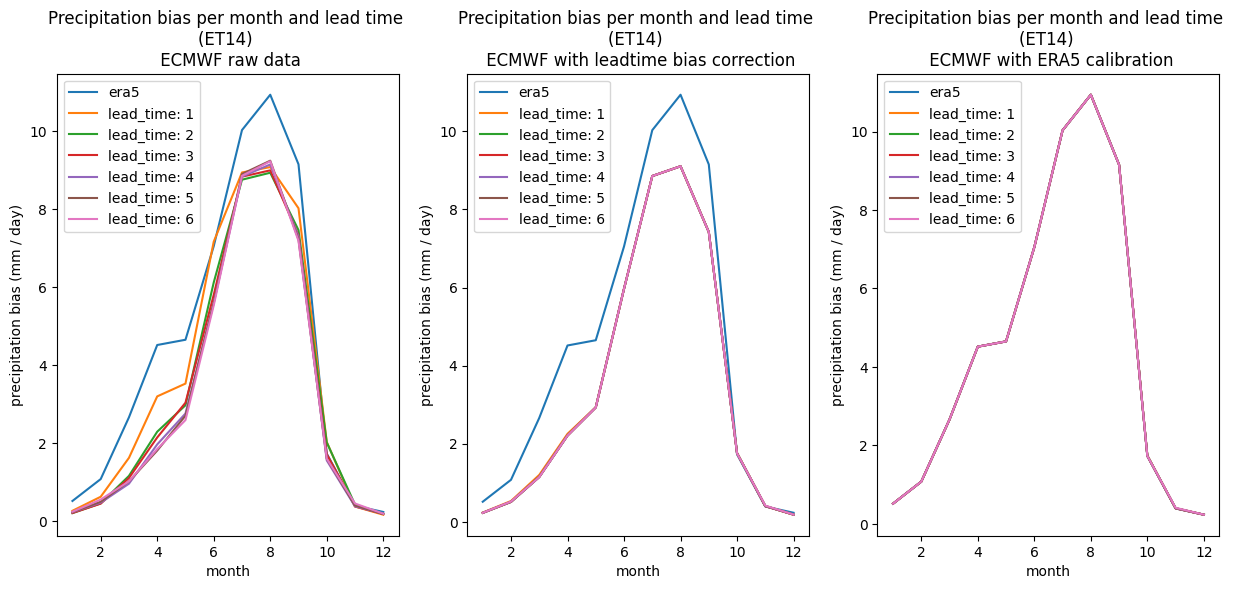

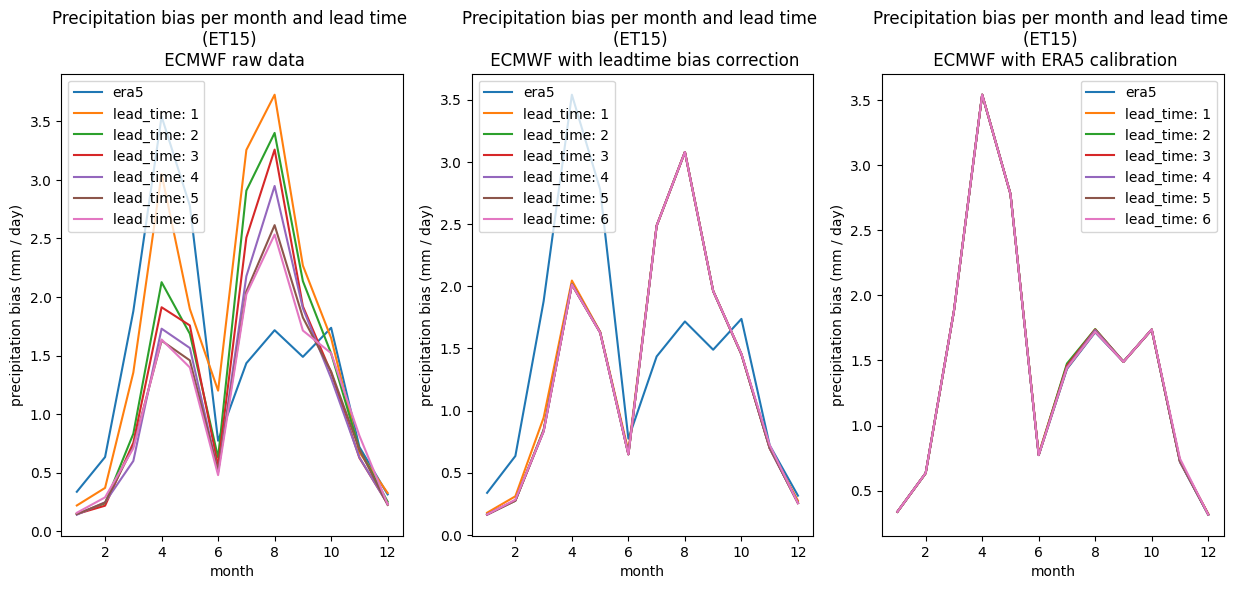

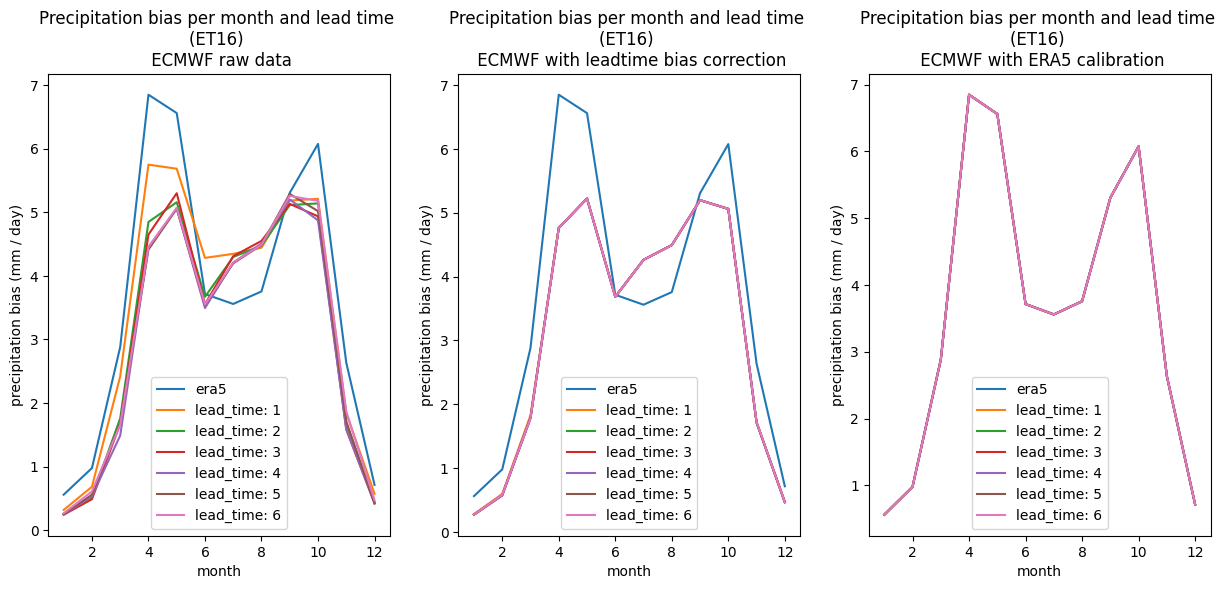

In [13]:

for adm_pcode in ecmwf_adm_df['adm_pcode'].unique():

    ecmwf_plot_df, era5_plot_df = prepare_climatology(ecmwf_adm_df[ecmwf_adm_df['adm_pcode'] == adm_pcode], era5_adm_df[era5_adm_df['adm_pcode'] == adm_pcode])
    plot_climatology(ecmwf_plot_df, era5_plot_df, scope_text = adm_pcode)


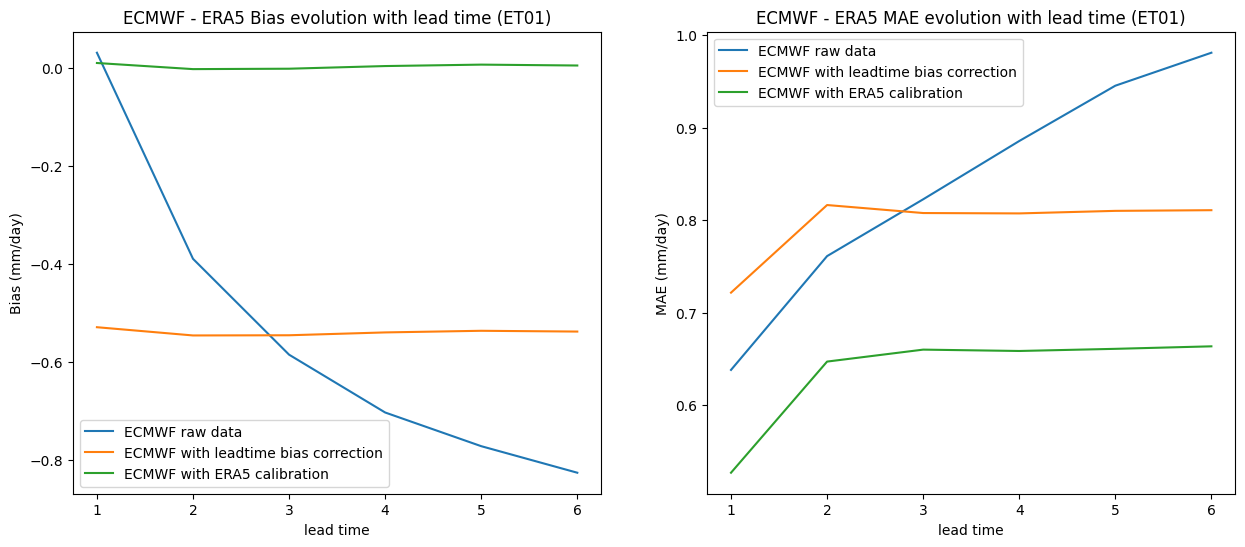

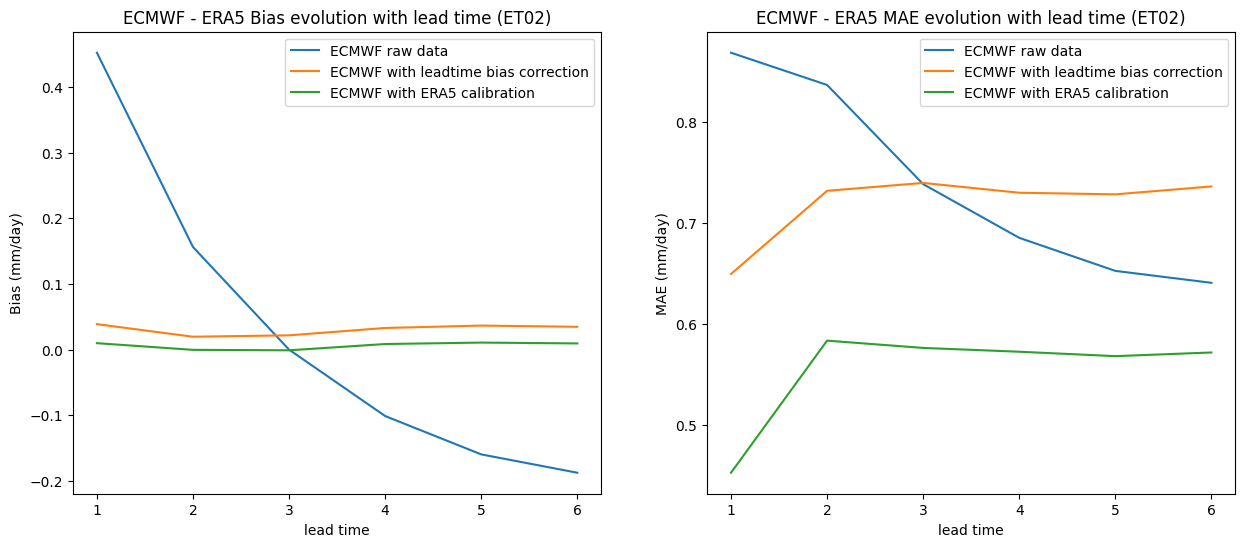

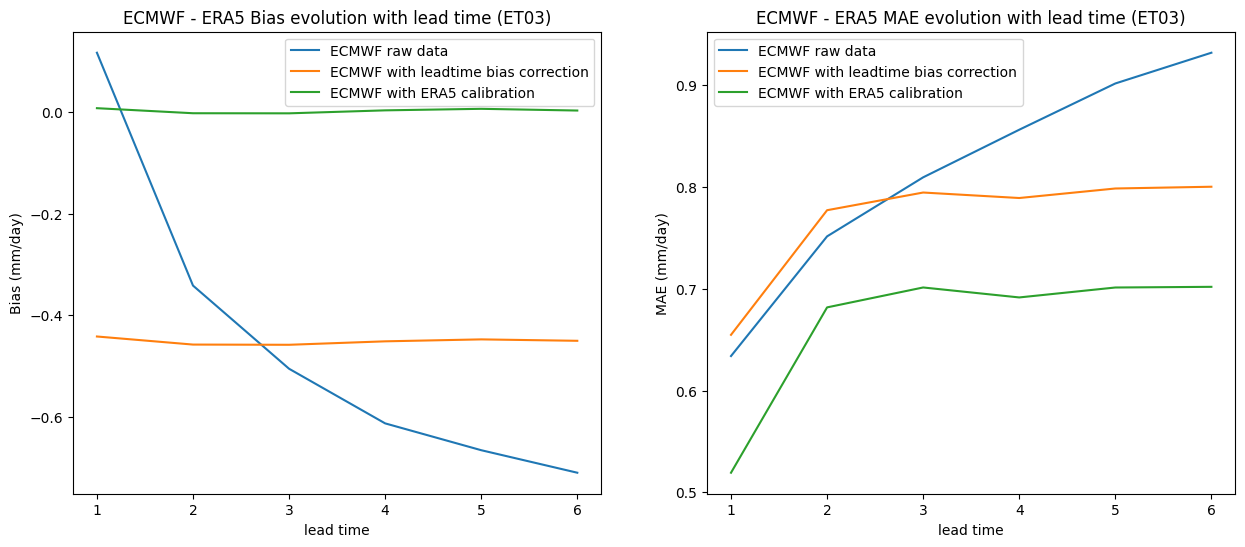

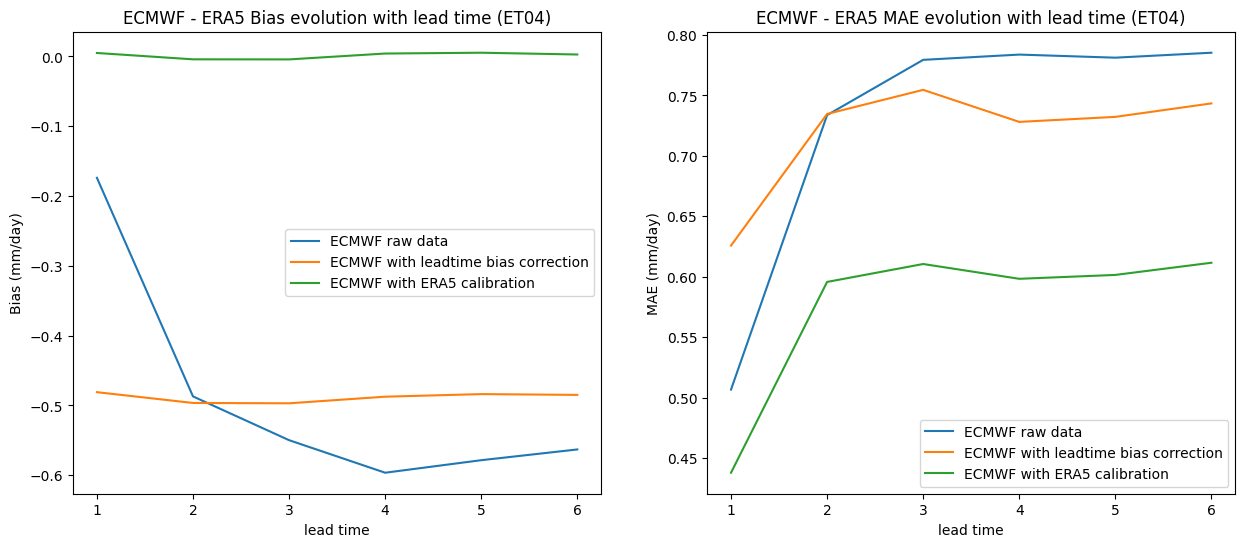

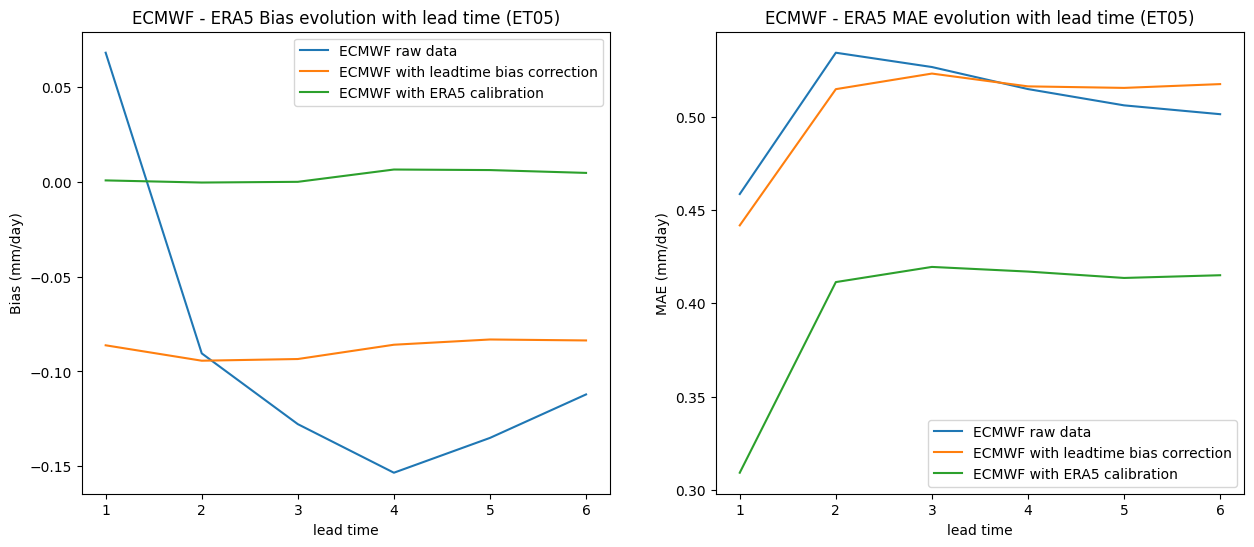

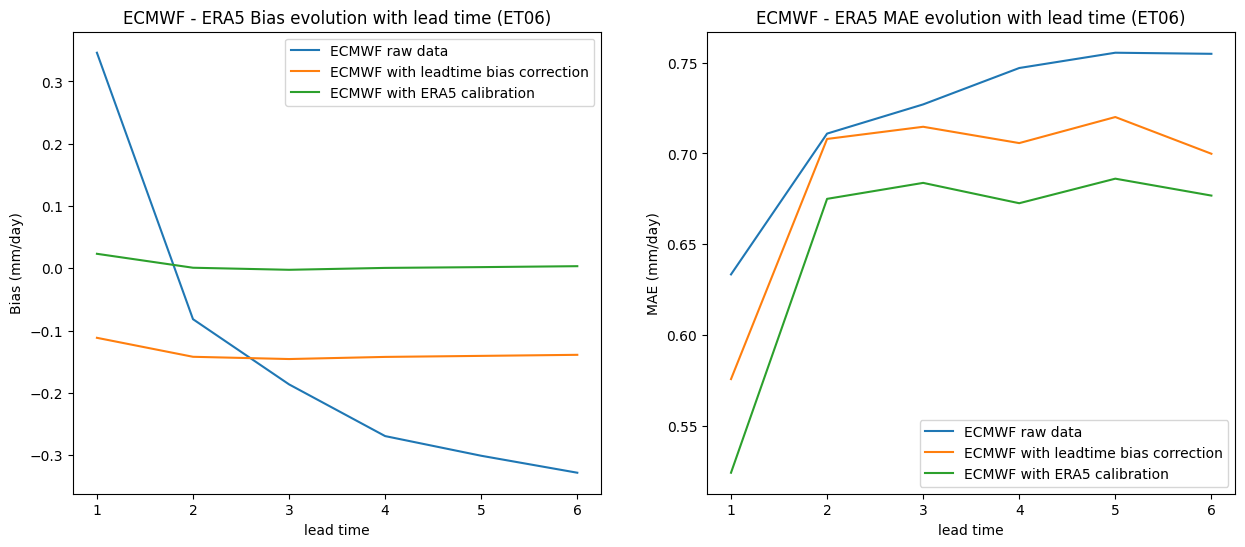

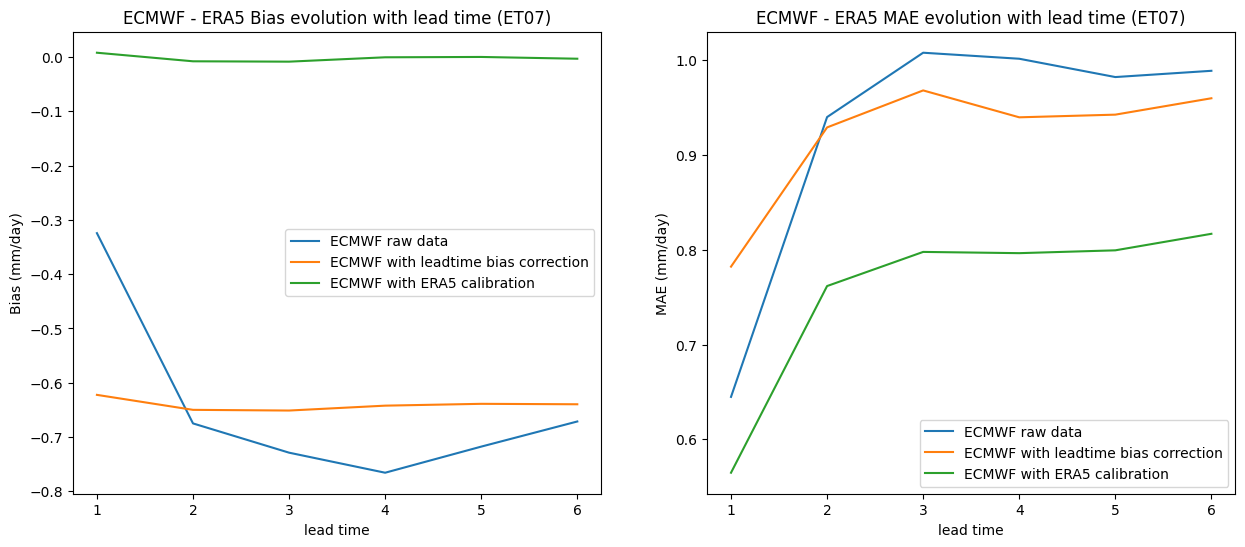

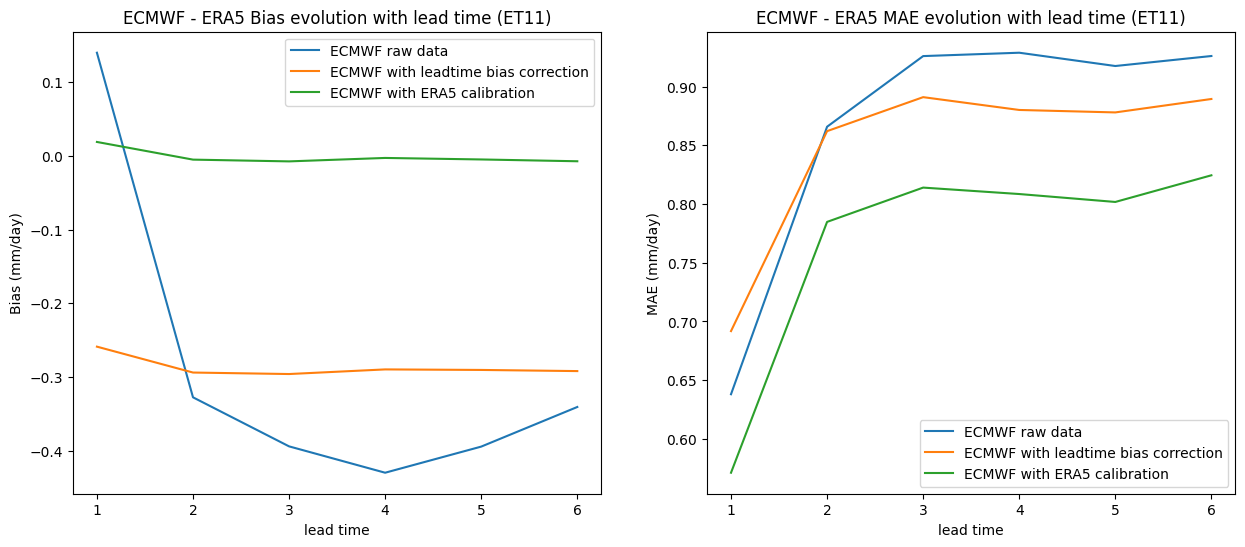

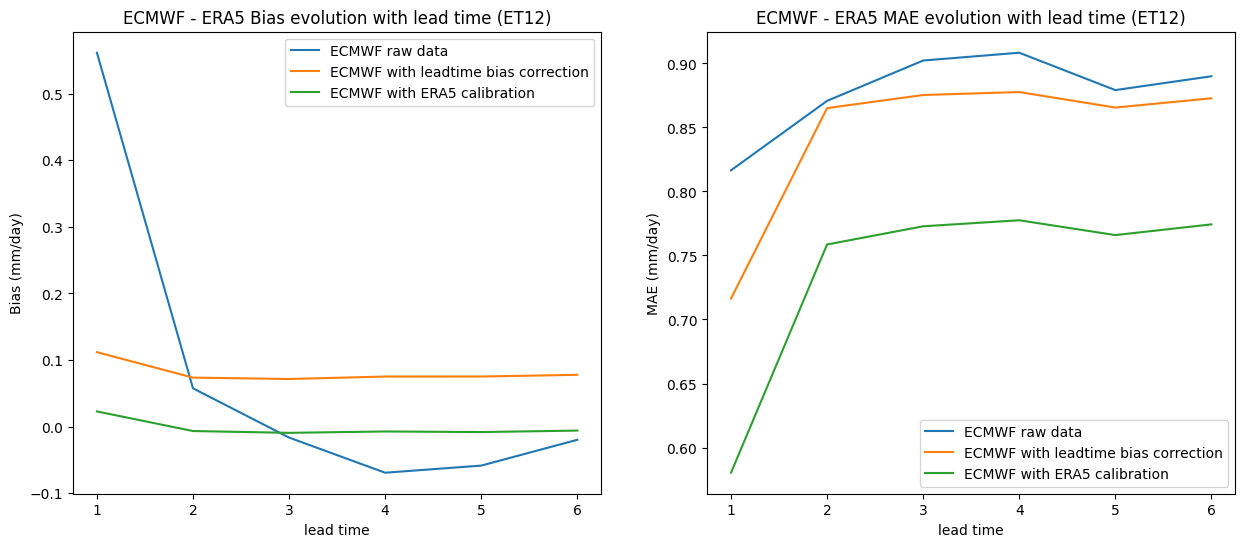

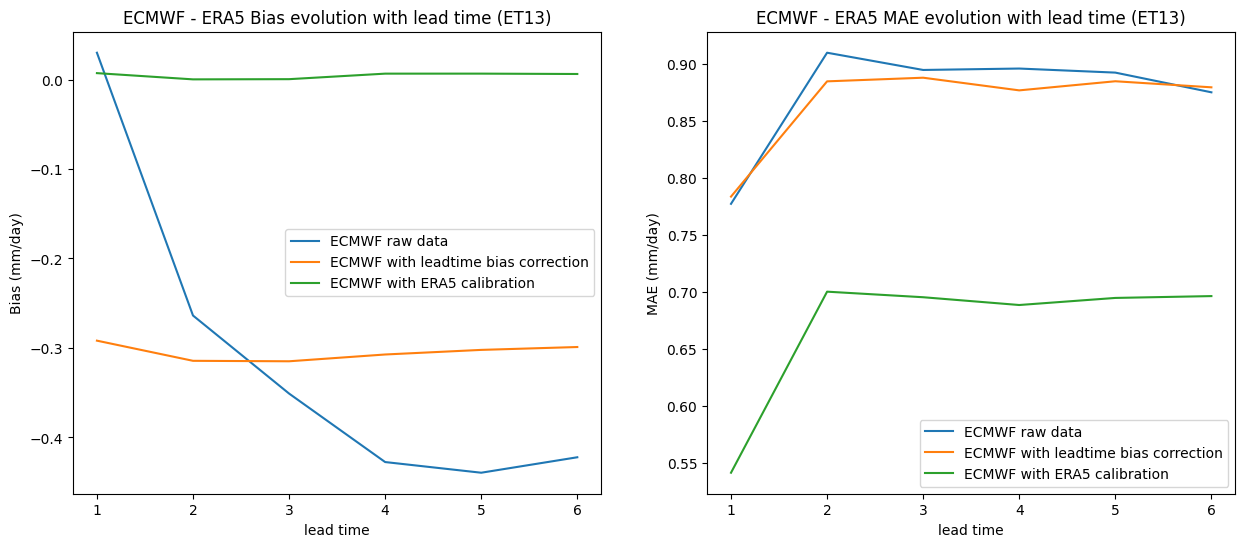

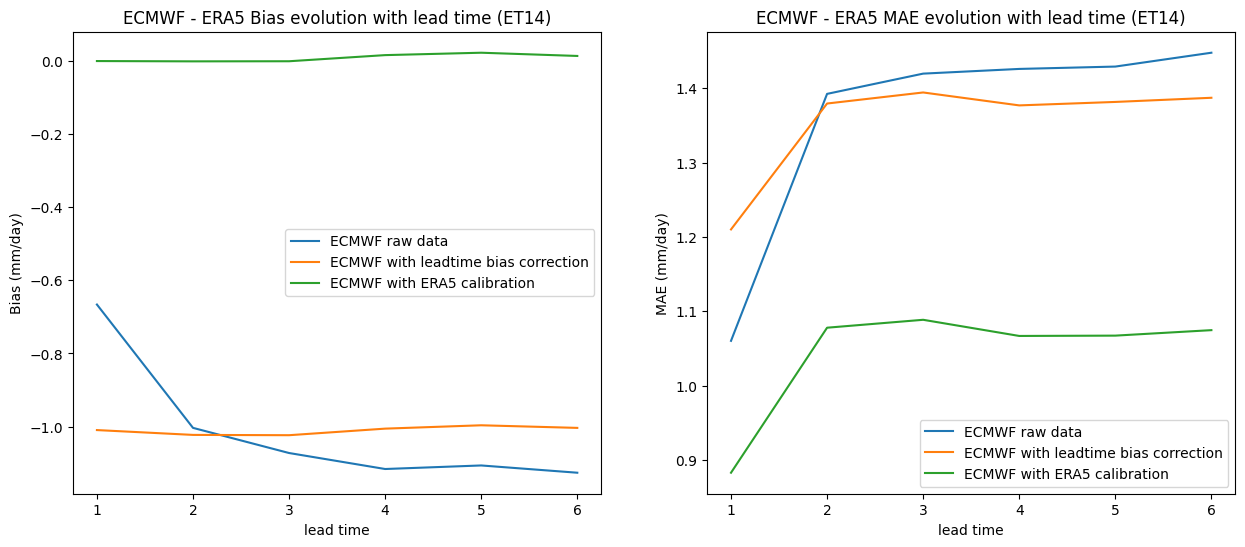

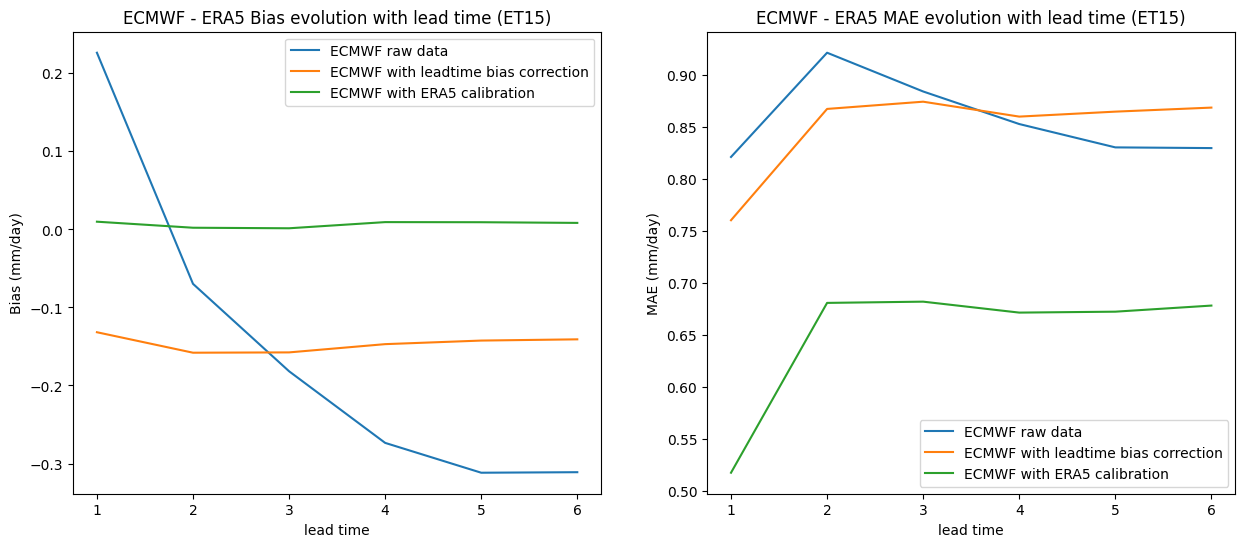

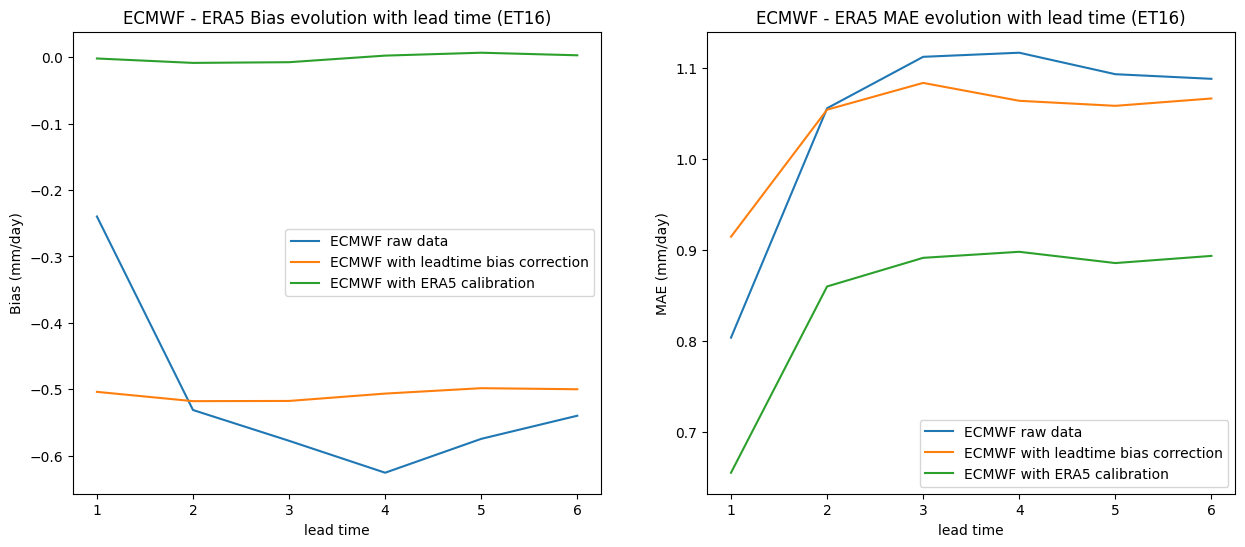

In [14]:

for adm_pcode in ecmwf_adm_df['adm_pcode'].unique():
    plot_df = prepare_leadtime_month_dependency(ecmwf_adm_df[ecmwf_adm_df['adm_pcode'] == adm_pcode], era5_adm_df[era5_adm_df['adm_pcode'] == adm_pcode], month_range)
    plot_leadtime_month_dependency(plot_df, scope_text = adm_pcode) 
